In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
pwd

'C:\\Users\\usuario\\PFM_SAB'

In [168]:
file='./DBs/Linkedin_searches.csv'

rcsv = pd.read_csv(file)
rcsv

,TÉRMINOS DE BÚSQUEDA EN LINKEDIN,Column2,BÚSQUEDA EXACTA,BÚSQUEDA NO EXACTA,Column1
0,020.BIM,BIM,8154,8154,20
1,019.BIM MANAGER,BIM MANAGER,949,2616,19
2,018.ARQUITECTO BIM,ARQUITECTO BIM,310,4133,18
3,017.BIM ARCHITECT,BIM ARCHITECT,224,322,17
4,016.TÉCNICO BIM,TÉCNICO BIM,191,2330,16
5,015.MODELADOR BIM,MODELADOR BIM,143,933,15
6,014.BIM MODELER,BIM MODELER,103,166,14
7,013.BIM MEP,BIM MEP,90,1276,13
8,012.ESPECIALISTA BIM,ESPECIALISTA BIM,70,833,12
9,011.BIM COORDINATOR,BIM COORDINATOR,63,407,11


## Example  

data = ((3, 1000), (10, 3), (100, 30), (500, 800), (50, 1))

plt.xlabel("FOO")
plt.ylabel("FOO")
plt.title("Testing")
plt.yscale('log')

dim = len(data[0])
w = 0.75
dimw = w / dim

x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = plt.bar(x + i * dimw, y, dimw, bottom=0.001)

plt.xticks(x + dimw / 2, map(str, x))

plt.show()

In [198]:
#linkdin_research = rcsv.drop(['TÉRMINOS DE BÚSQUEDA EN LINKEDIN', 'Column1'], axis=1)
linkdin_research = rcsv.drop([0])
linkdin_research = linkdin_research.rename(columns={"Column2": "BIM_Role", 
                                                    'TÉRMINOS DE BÚSQUEDA EN LINKEDIN':'PBI_Role_List',
                                                    "BÚSQUEDA EXACTA": "Exact_role",
                                                    'BÚSQUEDA NO EXACTA':'Unprecise_role'})
linkdin_research= linkdin_research.sort_values(['Unprecise_role'])
linkdin_research
# linkdin_research2= linkdin_research1.reset_index()

,PBI_Role_List,BIM_Role,Exact_role,Unprecise_role,Column1
19,003.DESARROLLADOR BIM,DESARROLLADOR BIM,1,22,3
11,009.BIM TECHNICIAN,BIM TECHNICIAN,41,63,9
17,001.BIM SUPPORT,BIM SUPPORT,1,65,1
18,002.SOPORTE TÉCNICO BIM,SOPORTE TÉCNICO BIM,1,110,2
6,014.BIM MODELER,BIM MODELER,103,166,14
13,005.BIM DEVELOPER,BIM DEVELOPER,6,169,5
3,017.BIM ARCHITECT,BIM ARCHITECT,224,322,17
14,006.DISEÑADOR BIM,DISEÑADOR BIM,6,359,6
9,011.BIM COORDINATOR,BIM COORDINATOR,63,407,11
16,004.BIM STRUCTURES,BIM STRUCTURES,3,612,4


# Categorización de la masa de roles BIM y la normalización de su nomenclatura. (Falta actualizarlo con resultados 2018)

Conclusiones: Aún no se han normalizado los roles BIM. Tesis SAB, todos quieren ser BIM Managers y hay muy poca experiencia.


AttributeError: Unknown property shrink

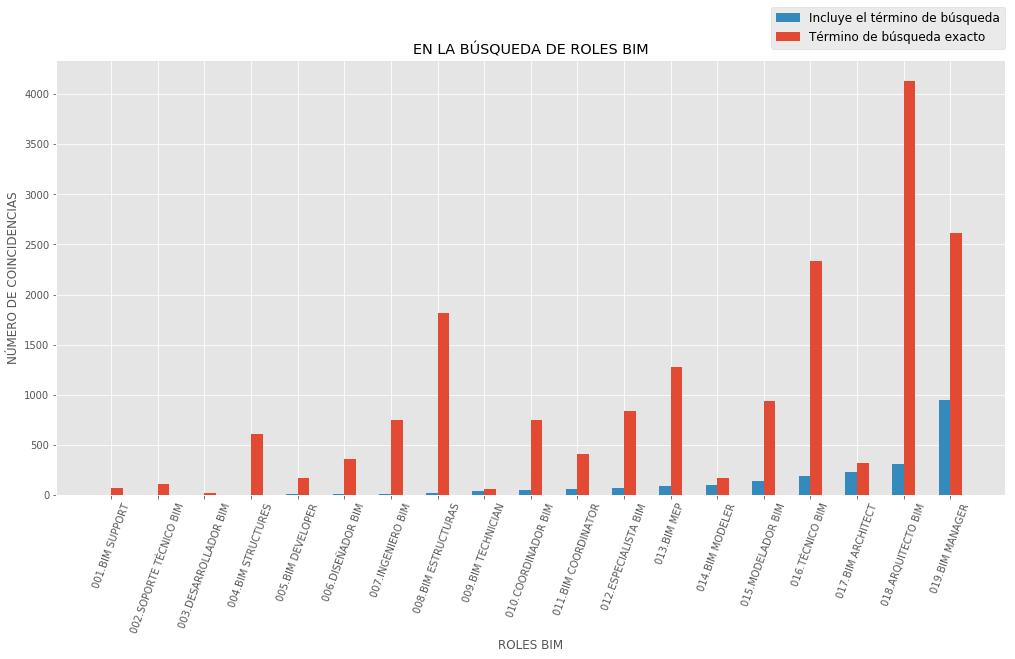

In [244]:
# (figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None)

fig = plt.figure(figsize=(17,8))
plt.xlabel("ROLES BIM")
plt.ylabel("NÚMERO DE COINCIDENCIAS")
plt.title("EN LA BÚSQUEDA DE ROLES BIM")
plt.xticks(rotation=70)
x=linkdin_research['PBI_Role_List']
y=linkdin_research['Unprecise_role']
y2=linkdin_research['Exact_role']
pl1= plt.bar(x,y, width=0.25, align='edge')
pl2=plt.bar(x,y2, width=-0.25, align='edge')
plt.legend([pl2, pl1], ["Incluye el término de búsqueda", "Término de búsqueda exacto"],loc=0,fontsize=12,
          bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=1, borderaxespad=0.)


plt.show()

# Evolución de la masa de profesionales especializados en BIM

Se analizarían tres categorías, coincidencias con término de búsqueda relativo en 2017 y en 2018 y requerimientos de mercado.
Para requerimientos de mercado sumaremos el total de técnicos representado en el año 2018 y le aplicaremos un porcentaje de técnicos que estimamos necesarios según nuestras experiencias y trabajos.
Ya que de base, este estudio no está basado en los roles sugeridos por diversas normativas BIM propuestas, sino frecuentemente en la "autoasignación" arbitraria de un rol por cada individuo en las redes sociales, hemos hecho una valoración de la utilidad real de dichos roles. Desestimamos algunos términos (no aplándoles un porcentaje)que consideramos aplicados por profesionales según sus sircunstancias específicas de empresa o por modas no atadas a ningún rigor productivo. 

BIM DEVELOPER / DESARROLLADOR BIM 18

SOPORTE TÉCNICO BIM / BIM SUPPORT 5

BIM ESTRUCTURAS 12

COORDINADOR BIM /BIM COORDINATOR 10

BIM MANAGER 4

MODELADOR BIM /BIM MODELER 35

BIM MEP 12

Se aplicará una etiqueta a cada barra con el porcentaje de más o de menos de lo necesario.
mirar enlace : https://matplotlib.org/examples/api/barchart_demo.html

Se hará énfasis en la oportunidad actual de trabajar como modelador en proyetos complejos para adquirir la experiencia que permitirá conocer y depurar los estándares BIM del futuro, que serán a todas luces más exigentes que ls actuales. Los que intentan comenzar como BIM Managers desde el minuto uno puede servirles a corto plazo, pero sin experiencia ni conocimiento real de los software será muy difícil que puedan mantener con solvencia dicho rol a lo largo de los años en comparación con profesionales que se habrán enfrentado a los problemas reales del BIM, sis estándares y sus contratiempos.

<Container object of 19 artists>

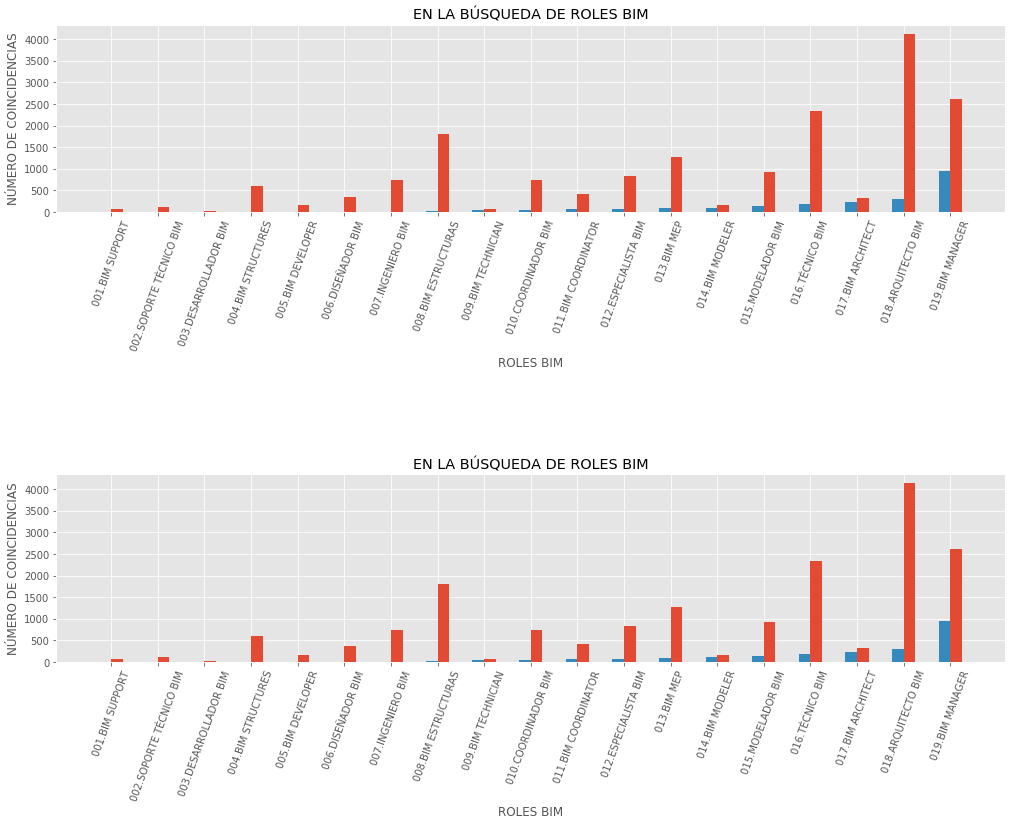

In [210]:
fig = plt.figure(figsize=(17,20))

ax1 = fig.add_subplot(511)
plt.xlabel("ROLES BIM")
plt.ylabel("NÚMERO DE COINCIDENCIAS")
plt.title("EN LA BÚSQUEDA DE ROLES BIM")
plt.xticks(rotation=70)
x=linkdin_research['PBI_Role_List']
y=linkdin_research['Unprecise_role']
y2=linkdin_research['Exact_role']
plt.bar(x,y, width=0.25, align='edge')
plt.bar(x,y2, width=-0.25, align='edge')

ax2 = fig.add_subplot(512)
plt.xlabel("ROLES BIM")
plt.ylabel("NÚMERO DE COINCIDENCIAS")
plt.title("EN LA BÚSQUEDA DE ROLES BIM")
plt.xticks(rotation=70)
x=linkdin_research['PBI_Role_List']
y=linkdin_research['Unprecise_role']
y2=linkdin_research['Exact_role']


plt.bar(x,y, width=0.25, align='edge')
plt.bar(x,y2, width=-0.25, align='edge')
